In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [3]:
seed = 97404

In [4]:
df = pd.read_csv("Final Data.csv", index_col="Unnamed: 0")

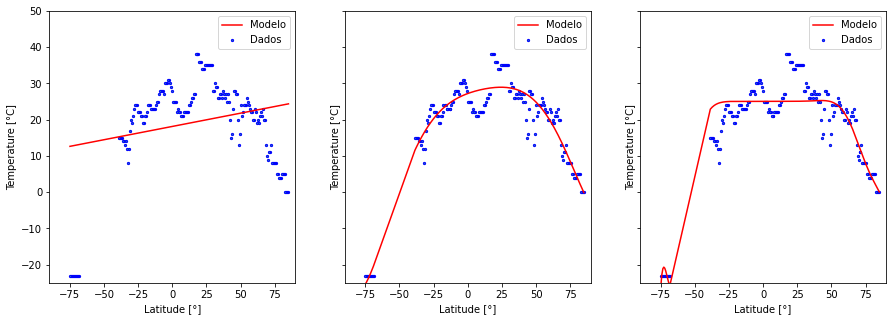

In [5]:
np.random.seed(0)

COMPLEXIDADE_DOS_MODELOS = [1, 6, 15]

fig, axes = plt.subplots(
    ncols=len(COMPLEXIDADE_DOS_MODELOS),
    nrows=1,
    figsize=(len(COMPLEXIDADE_DOS_MODELOS) * 5, 5),
    sharey=True,
)

for i in range(len(COMPLEXIDADE_DOS_MODELOS)):

    eixo = axes[i]

    # Este bloco cria o pipeline do modelo que será ajustado
    polynomial_features = PolynomialFeatures(
        degree=COMPLEXIDADE_DOS_MODELOS[i], include_bias=False
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("features_polinomiais", polynomial_features),
            ("regressao_linear", linear_regression),
        ]
    )
    pipeline.fit(df["latitude"].values[:, np.newaxis], df["temperature"].values)

    # Plotando!
    eixo.plot(
        df["latitude"],
        pipeline.predict(df["latitude"].values[:, np.newaxis]),
        label="Modelo",
        color="r",
    )
    eixo.scatter(df["latitude"].values, df["temperature"].values, edgecolor="b", s=5, label="Dados")

    # Configurando o plot
    eixo.set_xlabel("Latitude [°]")
    eixo.set_ylabel("Temperature [°C]")
    eixo.set_xlim((-90, 90))
    eixo.set_ylim((-25, 50))
    eixo.legend()

plt.show()

In [6]:
df = df.convert_dtypes()

In [7]:
df

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,is_day,temperature,weather_descriptions,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
8,84.22,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
9,83.49,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
10,82.77,14,163,1022,0.0,80,5,1,10,False,0,['Clear'],-4
11,82.05,28,109,1013,0.0,80,37,1,10,False,5,['Partly cloudy'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
225,-72.6,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
226,-73.3,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36
227,-74.1,30,121,1002,0.0,60,46,1,10,False,-23,['Partly cloudy'],-36


In [8]:
def remove_not_numbers(df):
    df_c = df.copy()
    for i in df_c.columns:
        if is_numeric_dtype(df_c[i]) == False or str(df_c[i].dtype) == 'boolean':
            #print(i, "removido")
            df_c = df_c.drop([i], axis=1)
        else:
            continue
    return df_c

In [9]:
test_size = 0.2
SEMENTE_ALEATORIA = seed
FEATURES = ["latitude", "wind_speed", "wind_degree", "pressure", "precip", "humidity", "cloudcover", "uv_index", "visibility"]
TARGET = ["temperature", "feelslike"]

df_num = remove_not_numbers(df)

indices = df_num.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=test_size, random_state=SEMENTE_ALEATORIA
)

df_treino = df_num.loc[indices_treino]
df_teste = df_num.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [10]:
# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)

In [11]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 16.475517267941274.


In [12]:
df_num

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4
11,82.05,28,109,1013,0.0,80,37,1,10,5,1
...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36


In [13]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[[ 20.59247304  20.64173266]
 [ 19.95622531  18.51310471]
 [ 18.13748559  17.64988382]
 [ 28.9741433   29.33304496]
 [ 22.6064601   24.41296281]
 [ 26.82314607  27.66342128]
 [ 23.09434745  21.30102605]
 [ 13.34392318  12.54435142]
 [ 38.15618576  38.50338344]
 [ 23.06411099  21.26834221]
 [ 23.13723655  21.93875321]
 [  0.55404336  -6.49964403]
 [ 22.44013819  20.51740098]
 [ 23.45455605  23.02313385]
 [ 21.14022976  22.6169237 ]
 [ 27.21481748  28.49236942]
 [  6.69764529   3.47138436]
 [ 15.53255533  14.51089074]
 [  6.0192049    2.40983212]
 [ 23.96361715  22.80630698]
 [ -3.74617247 -12.39149538]
 [ 14.41788127  15.06771392]
 [ 12.04552034  11.2071945 ]
 [ 38.09654125  38.4389112 ]
 [ -3.68404276 -12.3243368 ]
 [  6.757704     3.53630432]
 [ 14.24918146  15.29584016]
 [ 25.82732517  25.92161002]
 [ -3.6550489  -12.29299612]
 [ 19.82553757  18.87459453]
 [ 34.50414601  35.47618702]
 [ 12.94787673  11.23996029]
 [ 22.1076013   22.64308715]
 [ 22.8902495   22.14622298]
 [ 23.17098194

In [14]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 8.255970938353956.


# Árvore de decisões

In [15]:
from itertools import product
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

lista_valores = list(range(5,50+1))
lista_valores.append(None)

for n_folhas, n_profundidade in product(lista_valores, lista_valores):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=5 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=6 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=7 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=8 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=9 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=10 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=11 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=12 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=13 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=14 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=15 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=16 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=17 foi de 3.82.
O RMSE do modelo AD usando max_leaf_nodes=5 e max_depth=18 foi de 3.8

In [16]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[[ 11.  11.]
 [ 12.  11.]
 [ 13.  12.]
 [ 27.  28.]
 [ 20.  20.]
 [ 24.  25.]
 [ 28.  27.]
 [ 17.  17.]
 [ 38.  38.]
 [ 28.  27.]
 [ 23.  23.]
 [  5.  -1.]
 [ 24.  23.]
 [ 19.  19.]
 [ 24.  26.]
 [ 25.  26.]
 [  4.  -1.]
 [ 21.  21.]
 [  5.   1.]
 [ 23.  23.]
 [-23. -36.]
 [ 22.  22.]
 [ 23.  25.]
 [ 38.  38.]
 [-23. -36.]
 [  4.  -1.]
 [ 21.  21.]
 [ 22.  22.]
 [-23. -36.]
 [ 22.  22.]
 [ 27.  25.]
 [ 27.  29.]
 [ 26.  28.]
 [ 31.  30.]
 [ 24.  23.]
 [ 22.  22.]
 [ 19.  19.]]


In [17]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE}.")

O RMSE do modelo árvore de decisão foi de 1.8372051742268887.


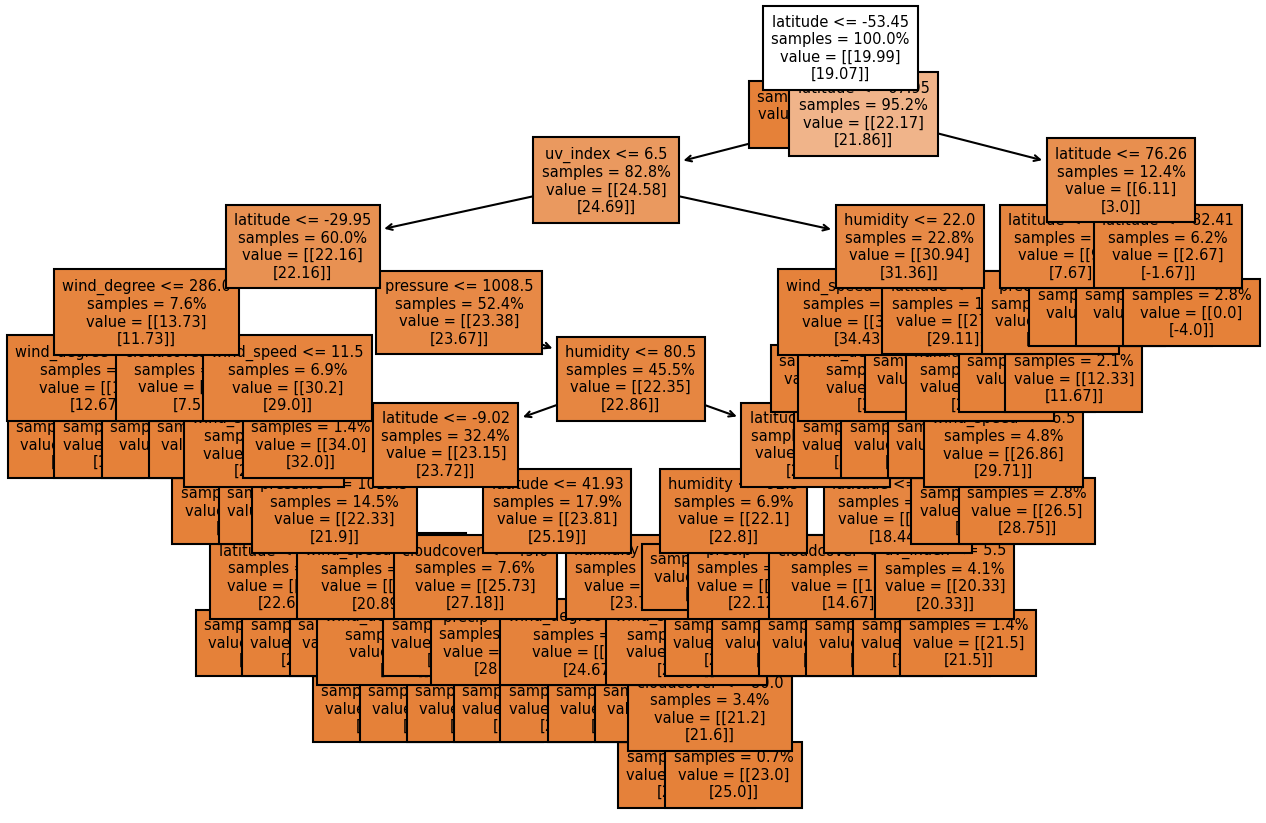

In [18]:
from sklearn import tree

# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=40, # Melhor valor
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(10, 7),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
    fontsize=7,
)

# mostra o plot para o usuário
plt.show()

In [19]:
from sklearn.tree import export_text

texto_dt = export_text(
    modelo_dt,
    feature_names=FEATURES,
    decimals=2,
)

print(texto_dt)

|--- latitude <= -53.45
|   |--- value: [-23.00, -36.00]
|--- latitude >  -53.45
|   |--- latitude <= 67.95
|   |   |--- uv_index <= 6.50
|   |   |   |--- latitude <= -29.95
|   |   |   |   |--- wind_degree <= 286.00
|   |   |   |   |   |--- wind_degree <= 238.50
|   |   |   |   |   |   |--- value: [17.00, 17.00]
|   |   |   |   |   |--- wind_degree >  238.50
|   |   |   |   |   |   |--- value: [14.25, 12.12]
|   |   |   |   |--- wind_degree >  286.00
|   |   |   |   |   |--- cloudcover <= 1.50
|   |   |   |   |   |   |--- value: [8.00, 5.00]
|   |   |   |   |   |--- cloudcover >  1.50
|   |   |   |   |   |   |--- value: [12.00, 10.00]
|   |   |   |--- latitude >  -29.95
|   |   |   |   |--- pressure <= 1008.50
|   |   |   |   |   |--- wind_speed <= 11.50
|   |   |   |   |   |   |--- wind_speed <= 4.50
|   |   |   |   |   |   |   |--- value: [30.20, 29.40]
|   |   |   |   |   |   |--- wind_speed >  4.50
|   |   |   |   |   |   |   |--- value: [27.67, 26.33]
|   |   |   |   |   |--- win

# Classificação

<AxesSubplot:>

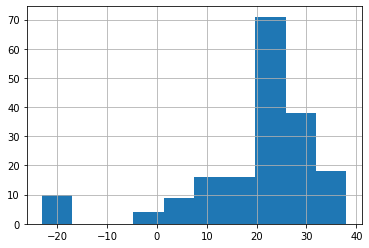

In [20]:
df_num["temperature"].hist(bins=10)

In [21]:
logic = df_num["temperature"] <= 5
print(len(df_num.loc[logic]),'Muito frio')
logic = (df_num["temperature"] > 5) & (df_num["temperature"] <= 16)
print(len(df_num.loc[logic]),'Frio')
logic = (df_num["temperature"] > 16) & (df_num["temperature"] <= 25)
print(len(df_num.loc[logic]),'Temperatura mediana')
logic = (df_num["temperature"] > 25) & (df_num["temperature"] <= 30)
print(len(df_num.loc[logic]),'Calor')
logic = (df_num["temperature"] > 30)
print(len(df_num.loc[logic]),'Muito calor')

23 Muito frio
26 Frio
77 Temperatura mediana
36 Calor
20 Muito calor


In [22]:
df_num['Temp Categórica'] = None

logic = df_num["temperature"] <= 5
df_num.loc[logic, 'Temp Categórica'] = 'Muito frio'
logic = (df_num["temperature"] > 5) & (df_num["temperature"] <= 16)
df_num.loc[logic, 'Temp Categórica'] = 'Frio'
logic = (df_num["temperature"] > 16) & (df_num["temperature"] <= 25)
df_num.loc[logic, 'Temp Categórica'] = 'Temperatura mediana'
logic = (df_num["temperature"] > 25) & (df_num["temperature"] <= 30)
df_num.loc[logic, 'Temp Categórica'] = 'Calor'
logic = (df_num["temperature"] > 30)
df_num.loc[logic, 'Temp Categórica'] = 'Muito Calor'
df_num

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility,temperature,feelslike,Temp Categórica
7,84.94,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
8,84.22,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
9,83.49,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
10,82.77,14,163,1022,0.0,80,5,1,10,0,-4,Muito frio
11,82.05,28,109,1013,0.0,80,37,1,10,5,1,Muito frio
...,...,...,...,...,...,...,...,...,...,...,...,...
224,-71.9,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
225,-72.6,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
226,-73.3,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio
227,-74.1,30,121,1002,0.0,60,46,1,10,-23,-36,Muito frio


In [44]:
test_size = 0.2
SEMENTE_ALEATORIA = seed
FEATURES = ["latitude", "wind_speed", "wind_degree", "pressure", "precip", "humidity", "cloudcover", "uv_index", "visibility"]
TARGET = ["Temp Categórica"]

indices = df_num.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=test_size, random_state=SEMENTE_ALEATORIA
)

df_treino = df_num.loc[indices_treino]
df_teste = df_num.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

In [45]:
modelo_dt = DecisionTreeClassifier(random_state=seed)

modelo_dt.fit(X_treino, y_treino)

previsao = modelo_dt.predict(X_teste)
#print(previsao)

___

In [46]:
from sklearn import metrics

In [47]:
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))
print("Precisão (micro):",metrics.precision_score(y_teste, previsao, average='micro'))
print("Precisão (macro):",metrics.precision_score(y_teste, previsao, average='macro'))
print("Precisão (weighted):",metrics.precision_score(y_teste, previsao, average='weighted'))

Accuracy: 0.918918918918919
Precisão (micro): 0.918918918918919
Precisão (macro): 0.888888888888889
Precisão (weighted): 0.9474474474474475


___

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10,12,14,16],
    'criterion' :['gini', 'entropy'],
    'max_leaf_nodes': [5,10,15,20,25,30,35,36,37,38,39,40,45,50]
}
CV_rfc = GridSearchCV(estimator=modelo_dt, param_grid=param_grid, cv= 5, n_jobs=8)
CV_rfc.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, max_features='auto',
                                              random_state=97404),
             n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 36, 37,
                                            38, 39, 40, 45, 50]})

In [54]:
print(CV_rfc.best_params_)
best_params = CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 25}


In [55]:
modelo_dt = DecisionTreeClassifier(random_state=seed)
modelo_dt.set_params(**best_params)

DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=25,
                       random_state=97404)

In [56]:
modelo_dt.fit(X_treino, y_treino)
previsao = modelo_dt.predict(X_teste)
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))
print("Precisão (micro):",metrics.precision_score(y_teste, previsao, average='micro'))
print("Precisão (macro):",metrics.precision_score(y_teste, previsao, average='macro'))
print("Precisão (weighted):",metrics.precision_score(y_teste, previsao, average='weighted'))

Accuracy: 0.918918918918919
Precisão (micro): 0.918918918918919
Precisão (macro): 0.9492063492063492
Precisão (weighted): 0.921921921921922


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_teste, previsao)

array([[ 5,  0,  0,  0,  2],
       [ 0,  2,  0,  0,  2],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  5,  2],
       [ 0,  0,  0,  0, 17]], dtype=int64)